In [1]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

import logging
from numpy import random
import gensim
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

Using TensorFlow backend.


In [2]:
df = pd.read_excel('wsd_data.xlsx')
df = df[pd.notnull(df['CATEGORY'])]
print(df['SENTENCE'].apply(lambda x: len(x.split(' '))).sum())

4729


In [3]:
def clean_text(text):
    # Strip HTML tags
    text = re.sub('<[^<]+?>', ' ', text)
 
    # Strip escaped quotes
    text = text.replace('\\"', '')
 
    # Strip quotes
    text = text.replace('"', '')
 
    return text

df['CLEAN_SENTENCE'] = df['SENTENCE'].apply(clean_text)
print(df['CLEAN_SENTENCE'].apply(lambda x: len(x.split(' '))).sum())

4729


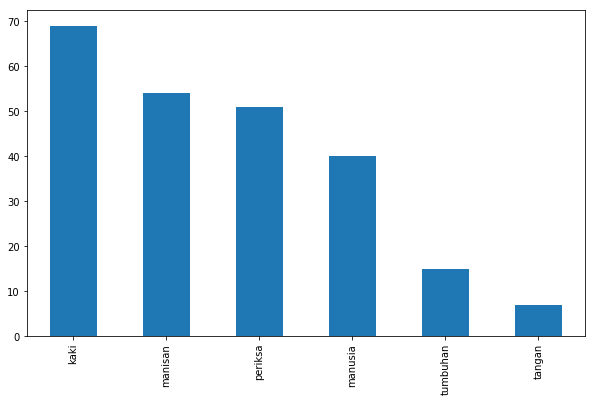

In [4]:
my_tags = ['manisan','manusia','kaki','tangan','periksa','tumbuhan']
plt.figure(figsize=(10,6))
df.CATEGORY.value_counts().plot(kind='bar');

In [5]:
X = df.CLEAN_SENTENCE
y = df.CATEGORY

train_posts, test_posts, train_tags, test_tags = train_test_split(X, y, test_size=0.2, random_state = 42)

In [6]:
max_words = 1000
#tokenize = text.Tokenizer(num_words=max_words, lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 128 #32
epochs = 10

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 3078      
_________________________________________________________________
activation_2 (Activation)    (None, 6)                 0         
Total params: 515,590
Trainable params: 515,590
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 169 samples, validate on 19 samples
Epoch 1/10
169/169 [==============================] - 3s 19ms/step - loss: 1.8270 - acc: 0.1243 - val_loss: 1.7770 - val_acc: 0.2105
Epoch 2/10
169/169 [==============================] - 0s 277us/step - loss: 1.6430 - acc: 0.4320 - val_loss: 1.6612 - val_acc: 0.4211
Epoch 3/10
169/169 [==============================] - 0s 277us/step - loss: 1.4695 - acc: 0.7337 - val_loss: 1.5538 - val_acc: 0.4211
Epoch 4/10
169/169 [==============================] - 0s 277us/step - loss: 1.3200 - acc: 0.8817 - val_loss: 1.4549 - val_acc: 0.6842
Epoch 5/10
169/169 [==============================] - 0s 370us/step - loss: 1.1916 - acc: 0.9172 - val_loss: 1.3624 - val_acc: 0.7368
Epoch 6/10
169/169 [==============================] - 0s 277us/step - loss: 1.0688 - acc: 0.8994 - val_loss: 1.2749 - val_acc: 0.7895
Epoch 7/10
169/169 [==============================] - 0s 277us/step - loss: 0.9592 - acc: 0.9349 - val_loss: 1.1922 - val_acc: 0.7895
Epoch 8/10
169/169

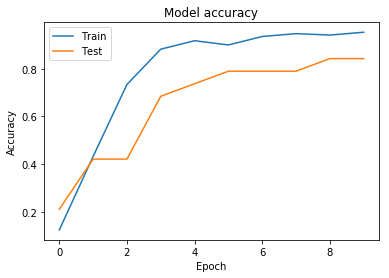

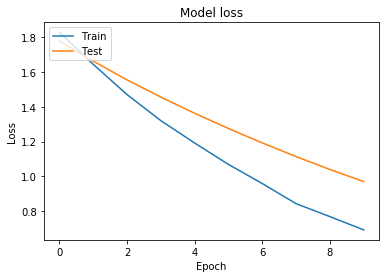

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

48/48 [==============================] - 0s 0us/step
Test accuracy: 0.75
